# <div style="padding: 60px;color:white;margin:10;font-size:100%;text-align:center;display:fill;border-radius:14px;overflow:hidden;background-image: url(https://images.rawpixel.com/image_800/cHJpdmF0ZS9sci9pbWFnZXMvd2Vic2l0ZS8yMDIyLTA1L3Vwd2s2MTkxNjM4NC13aWtpbWVkaWEtaW1hZ2Uta293ZXdrYTYuanBn.jpg)"><b><span style='color:white'>Daily Pedometer Data Analysis</span></b> </div>
***

- Daily pedometer data for one of the authors
- A data frame with 223 observations on the following 7 variables.

| Column   | Description                                                   |
|----------|---------------------------------------------------------------|
| StepCount| Number of steps taken in the day                               |
| Kcal     | Calories burned (according to pedometer)                      |
| Miles    | Miles walked                                                 |
| Weather  | Weather conditions (cold, rain, or shine)                      |
| Day      | Day of the week (F=Friday, M=Monday, R=Thursday, S=Saturday, T=Tuesday, U=Sunday, W=Wednesday) |
| Walk     | Whether the dogs were walked (1=yes or 0=no)                   |
| Steps    | Steps in units of 1,000 (StepCount/1000)                       |
| Details  | Additional details or notes recorded by the author             |
***

In [1]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

# from sklearn.model_selection import train_test_split, cross_val_score
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc, precision_recall_curve
# from sklearn.linear_model import LinearRegression
# from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/daily-pedometer-data/WalkTheDogs.csv


# Loading Data and Fixing some issues

In [3]:
df= pd.read_csv('/kaggle/input/daily-pedometer-data/WalkTheDogs.csv')
df= df.drop('Unnamed: 0', axis=1)
day_map = {'F': 'Friday', 'S': 'Saturday', 'U': 'Sunday', 'M': 'Monday', 'T': 'Tuesday', 'W': 'Wednesday', 'R': 'Thursday'}
df['Day'] = df['Day'].map(day_map)
df.head()

,StepCount,Kcal,Miles,Weather,Day,Walk,Steps
0,2615,8,1.4,shine,Friday,0,2.615
1,3323,12,1.8,shine,Saturday,0,3.323
2,2721,13,1.4,shine,Sunday,0,2.721
3,2454,12,1.3,shine,Monday,0,2.454
4,5528,152,3.1,cold,Tuesday,1,5.528


# summary statistics

In [4]:
def summary(df):
    # Print the shape of the DataFrame
    print(f'data shape: {df.shape}')  
    # Create a summary DataFrame
    summ = pd.DataFrame(df.dtypes, columns=['data type'])
    # Calculate the number of missing values
    summ['#missing'] = df.isnull().sum().values 
    # Calculate the percentage of missing values
    summ['%missing'] = df.isnull().sum().values / len(df)* 100
    # Calculate the number of unique values
    summ['#unique'] = df.nunique().values
    # Create a descriptive DataFrame
    desc = pd.DataFrame(df.describe(include='all').transpose())
    # Add the minimum, maximum, and first three values to the summary DataFrame
    summ['min'] = desc['min'].values
    summ['max'] = desc['max'].values
    summ['first value'] = df.loc[0].values
    summ['second value'] = df.loc[1].values
    summ['third value'] = df.loc[2].values
    
    # Return the summary DataFrame
    return summ

summary(df)

data shape: (223, 7)


,data type,#missing,%missing,#unique,min,max,first value,second value,third value
StepCount,int64,0,0.0,221,674.0,18194.0,2615,3323,2721
Kcal,int64,0,0.0,154,0.0,791.0,8,12,13
Miles,float64,0,0.0,62,0.0,10.2,1.4,1.8,1.4
Weather,object,0,0.0,3,NaN,NaN,shine,shine,shine
Day,object,0,0.0,7,NaN,NaN,Friday,Saturday,Sunday
Walk,int64,0,0.0,2,0.0,1.0,0,0,0
Steps,float64,0,0.0,221,0.674,18.194,2.615,3.323,2.721


# Correlation Analysis

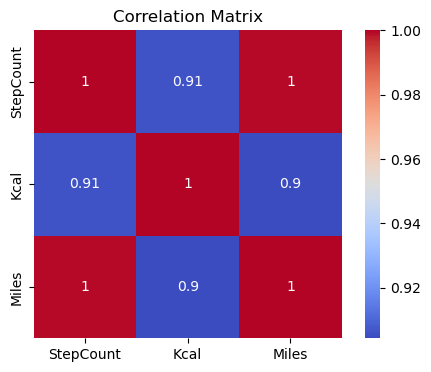

In [5]:
variables_of_interest = ['StepCount', 'Kcal', 'Miles']
correlation_matrix = df[variables_of_interest].corr()
#print(correlation_matrix)

plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

Based on the correlation coefficients calculated, we can see the following correlations:

- There is a strong positive correlation between StepCount and Kcal (correlation coefficient = 0.906). This indicates that as the number of steps taken -increases, the calories burned also tend to increase.

- There is also a strong positive correlation between StepCount and Miles (correlation coefficient = 0.999). This suggests that as the number of steps taken increases, the distance walked in miles also increases. This correlation is expected since steps and distance are closely related.

- There is a strong positive correlation between Kcal and Miles (correlation coefficient = 0.904). This indicates that as the calories burned increase, the distance walked in miles also tends to increase.


# Weekday Comparison

/tmp/ipykernel_20/938920509.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  weekday_avg = df.groupby('Day')['StepCount', 'Kcal', 'Miles'].mean()


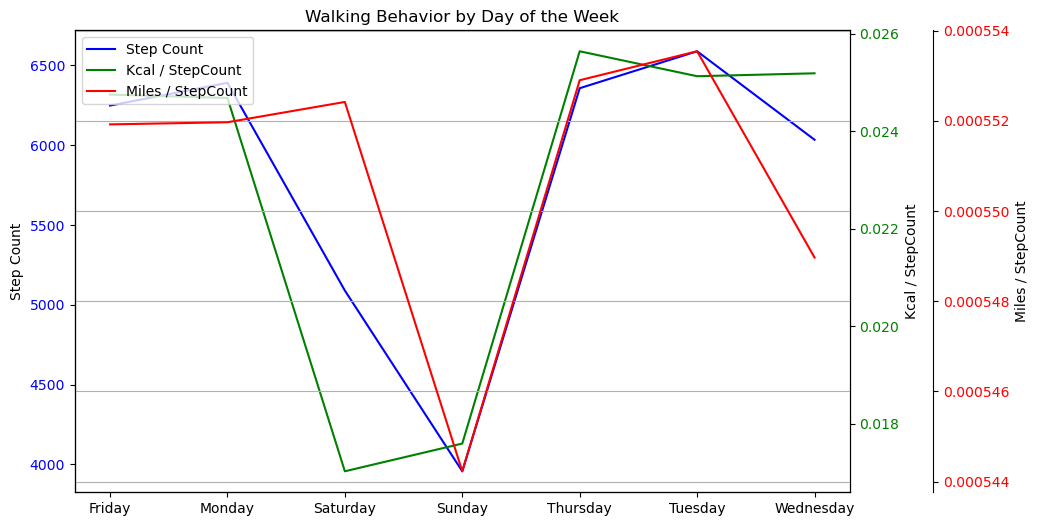

In [6]:
weekday_avg = df.groupby('Day')['StepCount', 'Kcal', 'Miles'].mean()
weekday_avg['Kcal_normalized'] = weekday_avg['Kcal'] / weekday_avg['StepCount']
weekday_avg['Miles_normalized'] = weekday_avg['Miles'] / weekday_avg['StepCount']
fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.plot(weekday_avg.index, weekday_avg['StepCount'], label='Step Count', color='blue')
ax1.set_ylabel('Step Count')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()
ax2.plot(weekday_avg.index, weekday_avg['Kcal_normalized'], label='Kcal / StepCount', color='green')
ax2.set_ylabel('Kcal / StepCount')
ax2.tick_params(axis='y', labelcolor='green')

ax3 = ax1.twinx()
ax3.spines['right'].set_position(('outward', 60))
ax3.plot(weekday_avg.index, weekday_avg['Miles_normalized'], label='Miles / StepCount', color='red')
ax3.set_ylabel('Miles / StepCount')
ax3.tick_params(axis='y', labelcolor='red')

ax3.spines['right'].set_position(('outward', 60))

plt.xlabel('Day of the Week')
plt.title('Walking Behavior by Day of the Week')

lines = [ax1.get_lines()[0], ax2.get_lines()[0], ax3.get_lines()[0]]
labels = [line.get_label() for line in lines]
plt.legend(lines, labels, loc='upper left')

plt.grid(True)

plt.show()

# Dog Walking Analysis

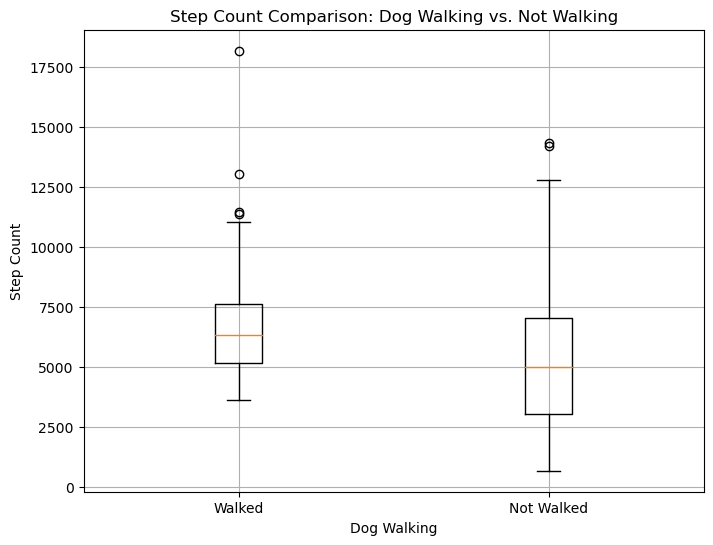

In [7]:
walk_avg = df.groupby('Walk')['StepCount'].mean()

walked_steps = df.loc[df['Walk'] == 1, 'StepCount']
not_walked_steps = df.loc[df['Walk'] == 0, 'StepCount']

plt.figure(figsize=(8, 6))
plt.boxplot([walked_steps, not_walked_steps], labels=['Walked', 'Not Walked'])
plt.xlabel('Dog Walking')
plt.ylabel('Step Count')
plt.title('Step Count Comparison: Dog Walking vs. Not Walking')
plt.grid(True)
plt.show()

# Weather Impact

/tmp/ipykernel_20/1451053490.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  weather_avg = df.groupby('Weather').mean()


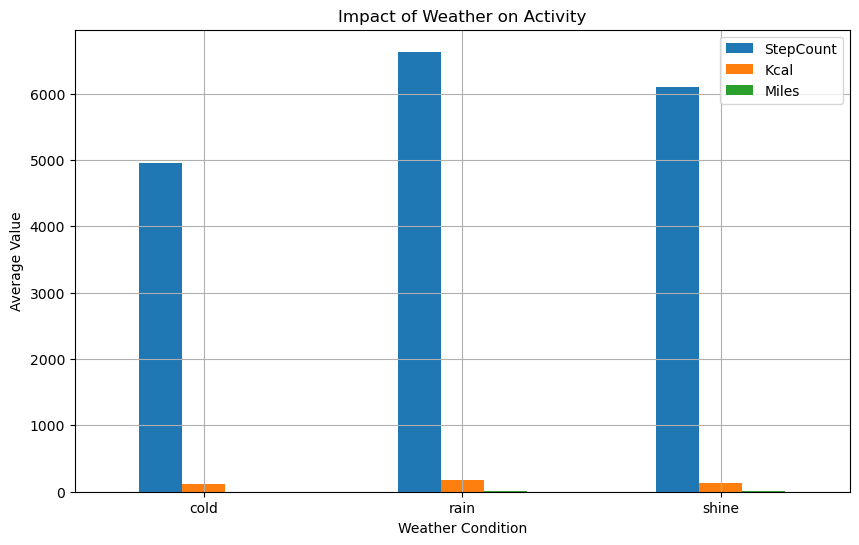

In [8]:
weather_avg = df.groupby('Weather').mean()

variables_of_interest = ['StepCount', 'Kcal', 'Miles']
weather_avg = weather_avg[variables_of_interest]

weather_avg.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Weather Condition')
plt.ylabel('Average Value')
plt.title('Impact of Weather on Activity')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()

# Step Count vs. Calories Burned

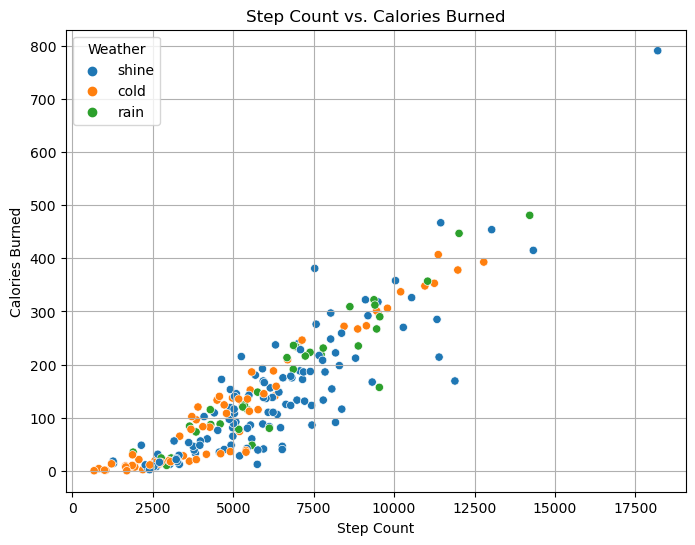

In [9]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='StepCount', y='Kcal', hue='Weather')
plt.xlabel('Step Count')
plt.ylabel('Calories Burned')
plt.title('Step Count vs. Calories Burned')
plt.grid(True)
plt.show()

# Step Count vs. Miles Walked

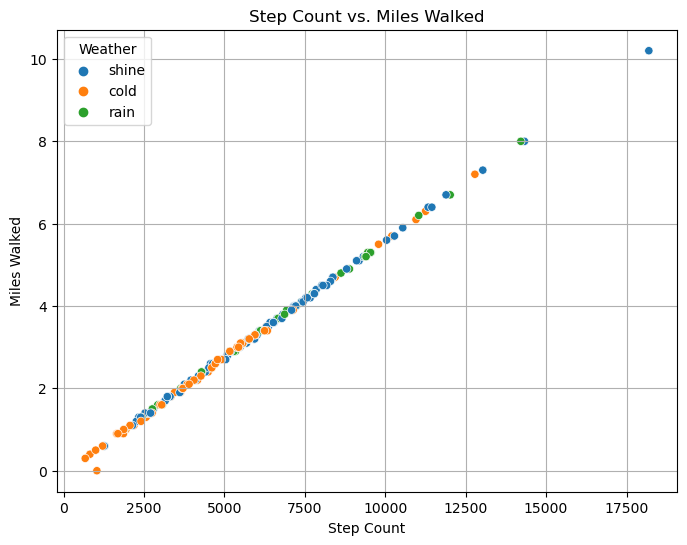

In [10]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='StepCount', y='Miles', hue='Weather')
plt.xlabel('Step Count')
plt.ylabel('Miles Walked')
plt.title('Step Count vs. Miles Walked')
plt.grid(True)
plt.show()

# Step Count Distribution across Weather and Day

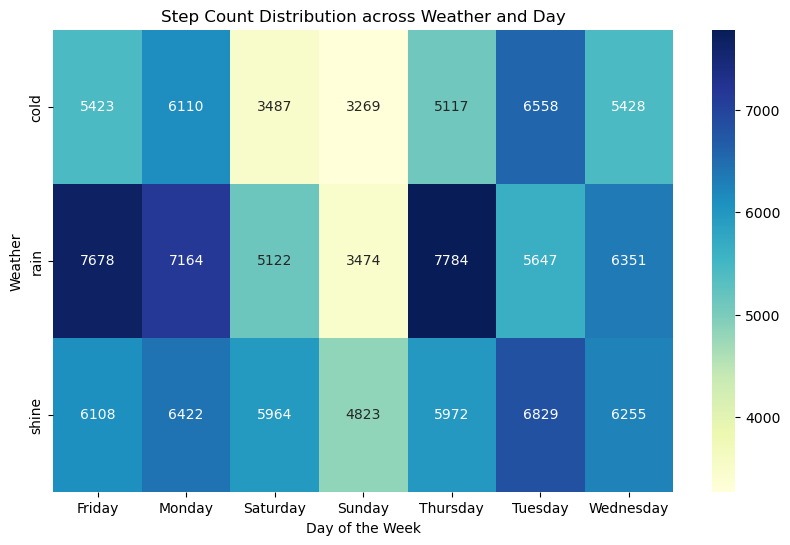

In [11]:
heatmap_data = df.pivot_table(index='Weather', columns='Day', values='StepCount', aggfunc='mean')
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt='.0f')
plt.xlabel('Day of the Week')
plt.ylabel('Weather')
plt.title('Step Count Distribution across Weather and Day')
plt.show()